In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import re
from unicodedata import normalize
import unidecode
import string
from spacy.lang.pt.stop_words import STOP_WORDS


In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.9 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('dados_cptm.csv', encoding='latin1')

In [ ]:
class limpezadata():
  '''Transformação de texto'''
  def preprocessamento_texto(self,texto, n):
    '''Ajustar caracteres alfa numéricos e palavras menores que n
      texto: texto a ser ajustado
      n: tamanho mínimo das palavras'''
    list_pos = 0
    cleaned_str = ''
    for word in texto.split():
        if list_pos == 0:
            if self.alpha_num_re.match(word) and len(word) > n:
                cleaned_str = word
            else:
                cleaned_str = ' '
        else:
            if self.alpha_num_re.match(word) and len(word) > n:
                cleaned_str = cleaned_str + ' ' + word
            else:
                cleaned_str += ' '
        list_pos += 1
    return cleaned_str

  def remove_stop_words(self,frase):
    palavras = frase.split()  # Divida a frase em palavras
    palavras_filtradas = [palavra for palavra in palavras if palavra.lower() not in self.STOP_WORDS]
    return ' '.join(palavras_filtradas)
  # retirar url's
  url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?')
  # pontuacao
  punc_re = re.compile('[%s]' % re.escape(string.punctuation))
  # numeros
  num_re = re.compile('(\\d+)')
  # alfa numericos
  alpha_num_re = re.compile("^[a-z0-9_.]+$")
  # mencoes
  mention_re = re.compile('@(\w+)')
  def __init__(self, df):
    self.df = df
    self.df['texto_do_twitter'] = self.df['texto_do_twitter'].astype(str)
    self.df['texto_do_twitter'] = self.df['texto_do_twitter'].apply(lambda x: x.lower())
    self.df['texto_do_twitter'] = self.df['texto_do_twitter'].apply(lambda x: num_re.sub('', x))
    self.df['texto_do_twitter'] = self.df['texto_do_twitter'].apply(lambda x: alpha_num_re.sub('', x))
    self.df['texto_do_twitter'] = self.df['texto_do_twitter'].apply(lambda x: url_re.sub('', x))
    self.df['texto_do_twitter'] = self.df['texto_do_twitter'].apply(lambda x: mention_re.sub('', x))
    self.df['texto_do_twitter'] = self.df['texto_do_twitter'].apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))
    self.df['texto_do_twitter'] = self.df['texto_do_twitter'].apply(remove_stop_words)
    self.df['texto_do_twitter'] = self.df['texto_do_twitter'].apply(lambda x: preprocessamento_texto(x, 3))



In [ ]:
limpezadata(df)

In [ ]:
df.head()

,created,id,texto_do_twitter,screenName,polaridade,data_ajustada
0,2017-02-28T18:20:24Z,836687521182547968,esperando trem absurdo,_richardbatista,-1,2017-02-28
1,2017-02-28T18:20:13Z,836687476483731456,linha velocidade reduzida linha veloci...,transitoagoraSP,-1,2017-02-28
2,2017-02-28T18:20:13Z,836687475984613376,linha operacao normal linha operacao n...,transitoagoraSP,1,2017-02-28
3,2017-02-28T18:20:13Z,836687475468713984,linha velocidade reduzida linha veloci...,transitoagoraSP,-1,2017-02-28
4,2017-02-28T18:09:15Z,836684713209257984,durante semana reprimem comercio queria fi...,Lik001,-1,2017-02-28


###Exemplos de tratamentos

In [ ]:
# Minusculos
texto_ajustado = df['texto_do_twitter'].apply(lambda x: x.lower())
# Numeros
texto_ajustado = texto_ajustado.apply(lambda x: num_re.sub('', x))
# Alpha Numéricos
texto_ajustado = texto_ajustado.apply(lambda x: alpha_num_re.sub('', x))
# Limpar URL
texto_ajustado = texto_ajustado.apply(lambda x: url_re.sub('', x))
# Menções
texto_ajustado = texto_ajustado.apply(lambda x: mention_re.sub('', x))
# Acentuação
texto_ajustado = texto_ajustado.apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))


In [ ]:
def preprocessamento_texto(texto, n):
  '''Ajustar caracteres alfa numéricos e palavras menores que n
     texto: texto a ser ajustado
     n: tamanho mínimo das palavras'''
  list_pos = 0
  cleaned_str = ''
  for word in texto.split():
      if list_pos == 0:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = word
          else:
              cleaned_str = ' '
      else:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = cleaned_str + ' ' + word
          else:
              cleaned_str += ' '
      list_pos += 1
  return cleaned_str

In [ ]:
def remove_stop_words(frase):
    palavras = frase.split()  # Divida a frase em palavras
    palavras_filtradas = [palavra for palavra in palavras if palavra.lower() not in STOP_WORDS]
    return ' '.join(palavras_filtradas)

In [ ]:
texto_ajustado = texto_ajustado.apply(remove_stop_words)
texto_ajustado = texto_ajustado.apply(lambda x: preprocessamento_texto(x, 3))

In [ ]:
df['texto_twitter_ajustado'] = texto_ajustado

In [ ]:
texto_completo = " ".join(s for s in df['texto_twitter_ajustado'])


In [ ]:
wc = WordCloud()
#wc = WordCloud(max_font_size=40, background_color='white')
wc.generate(texto_completo)

(-0.5, 399.5, 199.5, -0.5)

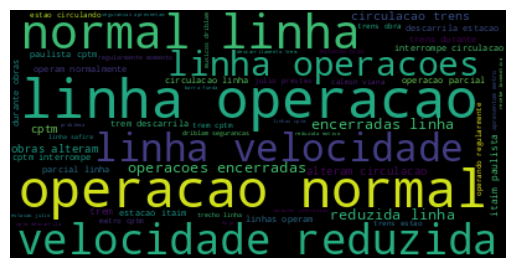

In [ ]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 715.5, 361.5, -0.5)

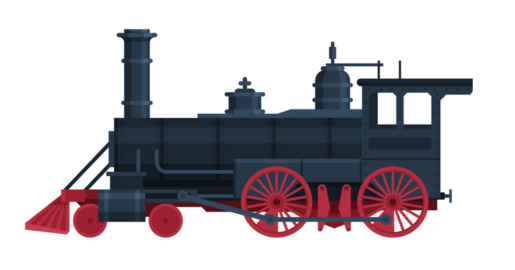

In [ ]:
trem_formato = np.array(Image.open('trem.png'))
plt.figure()
plt.imshow(trem_formato, interpolation='bilinear')
plt.axis("off")

In [ ]:
wc = WordCloud(background_color='white', mask=trem_formato)
wc.generate(texto_completo)
wc.to_file("trem.png")

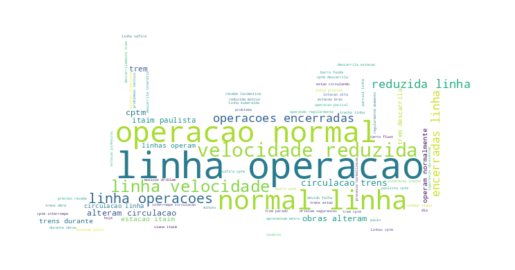

In [ ]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plot_path = 'trem_cptm_wordcloud.png'
plt.savefig(plot_path,  bbox_inches='tight', dpi = 300)